In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [44]:
data = pd.read_csv('documents/responses.csv')


In [45]:
data.info

<bound method DataFrame.info of                  Category Country State  Age  Gender Before-Environment  \
0   SchoolCollegeTraining      US    TX   14    Male           Physical   
1   SchoolCollegeTraining      US    MD   13    Male           Physical   
2              Homeschool      US    TX   16  Female            Virtual   
3   SchoolCollegeTraining      US    GA   17    Male           Physical   
4   SchoolCollegeTraining      GB   NaN   14    Male           Physical   
5   SchoolCollegeTraining      US    WV   17    Male           Physical   
6   SchoolCollegeTraining      US    MO   18  Female           Physical   
7   SchoolCollegeTraining      US    PA   17    Male           Physical   
8              Homeschool      US    IL   16  Female             Hybrid   
9   SchoolCollegeTraining      US    MN   15  Female           Physical   
10             Homeschool      US    TX   18    Male             Hybrid   
11             Homeschool      US    FL   15  Female           Physi

In [46]:
data.head

<bound method NDFrame.head of                  Category Country State  Age  Gender Before-Environment  \
0   SchoolCollegeTraining      US    TX   14    Male           Physical   
1   SchoolCollegeTraining      US    MD   13    Male           Physical   
2              Homeschool      US    TX   16  Female            Virtual   
3   SchoolCollegeTraining      US    GA   17    Male           Physical   
4   SchoolCollegeTraining      GB   NaN   14    Male           Physical   
5   SchoolCollegeTraining      US    WV   17    Male           Physical   
6   SchoolCollegeTraining      US    MO   18  Female           Physical   
7   SchoolCollegeTraining      US    PA   17    Male           Physical   
8              Homeschool      US    IL   16  Female             Hybrid   
9   SchoolCollegeTraining      US    MN   15  Female           Physical   
10             Homeschool      US    TX   18    Male             Hybrid   
11             Homeschool      US    FL   15  Female           Physica

In [47]:
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by='count', ascending = False)
print(missing)

                        count     %
State                      12  30.0
Gender                      3   7.5
Category                    0   0.0
Country                     0   0.0
Age                         0   0.0
Before-Environment          0   0.0
Before-ClassworkStress      0   0.0
Before-HomeworkStress       0   0.0
Before-HomeworkHours        0   0.0
Now-Environment             0   0.0
Now-ClassworkStress         0   0.0
Now-HomeworkStress          0   0.0
Now-HomeworkHours           0   0.0
FamilyRelationships         0   0.0
FriendRelationships         0   0.0


In [48]:
data.select_dtypes('object')


,Category,Country,State,Gender,Before-Environment,Now-Environment
0,SchoolCollegeTraining,US,TX,Male,Physical,Virtual
1,SchoolCollegeTraining,US,MD,Male,Physical,Virtual
2,Homeschool,US,TX,Female,Virtual,Virtual
3,SchoolCollegeTraining,US,GA,Male,Physical,Physical
4,SchoolCollegeTraining,GB,NaN,Male,Physical,Physical
5,SchoolCollegeTraining,US,WV,Male,Physical,Virtual
6,SchoolCollegeTraining,US,MO,Female,Physical,Virtual
7,SchoolCollegeTraining,US,PA,Male,Physical,Virtual
8,Homeschool,US,IL,Female,Hybrid,Hybrid
9,SchoolCollegeTraining,US,MN,Female,Physical,Virtual


In [51]:
import warnings

# Suppressing the FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your code
means = data.groupby('Age').mean()
means.head()

# Filter data for ages 14 to 18
filtered_data = data[data['Age'].isin([14, 15, 16, 17, 18])]

# Calculate means
means = filtered_data.groupby('Age').mean()
means.head()

,Before-ClassworkStress,Before-HomeworkStress,Before-HomeworkHours,Now-ClassworkStress,Now-HomeworkStress,Now-HomeworkHours,FamilyRelationships,FriendRelationships
Age,,,,,,,,
14,2.666667,3.500000,3.5,4.500000,5.000000,5.250000,0.166667,-0.333333
15,1.900000,2.300000,1.8,3.700000,4.100000,5.000000,0.300000,0.300000
16,2.666667,3.166667,3.5,3.833333,4.666667,4.000000,0.333333,-0.666667
17,2.444444,3.444444,3.0,3.555556,4.000000,4.611111,0.000000,-1.444444
18,2.500000,2.500000,3.5,3.500000,4.000000,5.000000,-1.000000,-1.500000


<Figure size 1000x600 with 0 Axes>

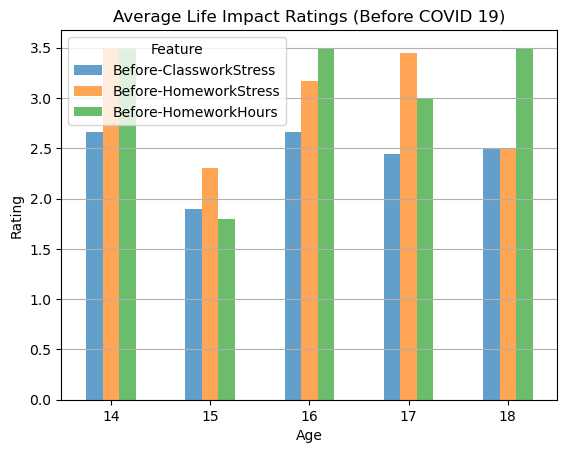

<Figure size 1000x600 with 0 Axes>

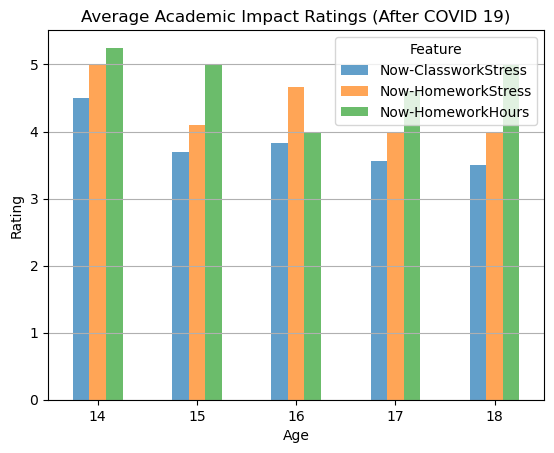

In [65]:
import matplotlib.pyplot as plt

# Select columns starting with "Before"
before_columns = [col for col in data.columns if col.startswith('Before')]

# Select columns starting with "Now"
now_columns = [col for col in data.columns if col.startswith('Now')]

# Filter data for "Before" columns
before_data = data.loc[data['Age'].between(14, 18), ['Age'] + before_columns]

# Filter data for "Now" columns
now_data = data.loc[data['Age'].between(14, 18), ['Age'] + now_columns]

# Plot for "Before" columns
plt.figure(figsize=(10, 6))
before_data.groupby('Age').mean().plot(kind='bar', alpha=0.7)
plt.title('Average Life Impact Ratings (Before COVID 19)')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.show()

# Plot for "Now" columns
plt.figure(figsize=(10, 6))
now_data.groupby('Age').mean().plot(kind='bar', alpha=0.7)
plt.title('Average Academic Impact Ratings (After COVID 19)')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(title='Feature')
plt.show()


<Figure size 1000x600 with 0 Axes>

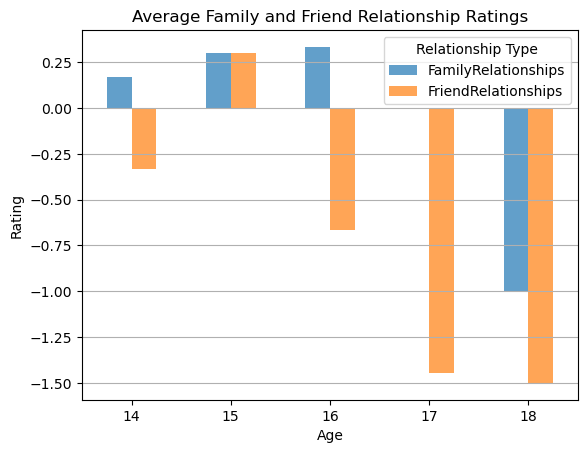

In [63]:
import matplotlib.pyplot as plt

# Filter data for ages 14 to 18
filtered_data = data[data['Age'].between(14, 18)]

# Calculate the average of family and friend relationships for filtered data
relationships_means = filtered_data.groupby('Age')[['FamilyRelationships', 'FriendRelationships']].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
relationships_means.plot(kind='bar', alpha=0.7)
plt.title('Average Family and Friend Relationship Ratings')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(title='Relationship Type')
plt.show()
